In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem

from utils import *

In [20]:
matchms_scores = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.0035_1%I_all_peaks_with_0s_only_matching.tsv", sep="\t")
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_scores': 'scores'}, inplace=True)
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_matches': 'matches'}, inplace=True)

matchms_scores = append_classes(matchms_scores, 'query')
df = normalize_df(append_spectrum_metadata(matchms_scores))
del df['peak_comments']

matches_col = 'matches'
scores_col = 'scores'

df['matches_norm_query'] = df[matches_col] / df['n_peaks_query']
df['matches_norm_reference'] = df[matches_col] / df['n_peaks_reference']

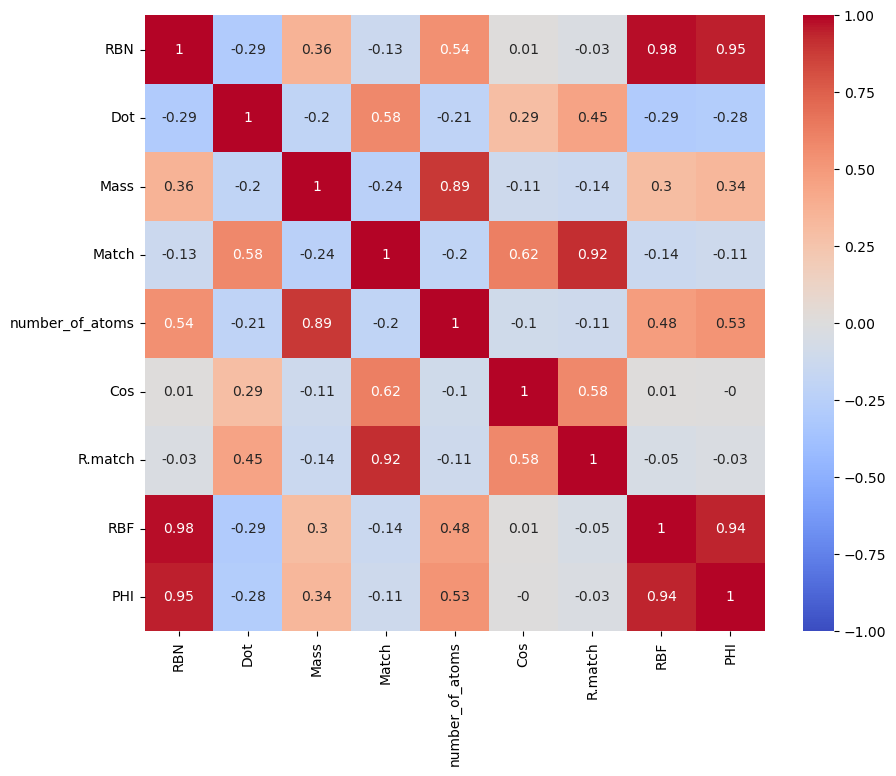

In [21]:
wang_db = pd.read_csv("../data/reference/13321_2020_470_MOESM1_ESM.csv")
wang_props = ["RBN", "Dot", "Mass", "Match", "number_of_atoms", "Cos", "R.match", "RBF", "PHI"]
# Assuming `df` is your DataFrame
corr_wang = wang_db[wang_props].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_wang, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
# plt.title('Pearson Correlations')
plt.show()

In [22]:
properties = [
    'scores',
    'matches',
    'matches_norm_query',
    'matches_norm_reference',
    'molecular_flexibility',
    'rotatable_bonds',
    'stereo_centers',
    'molecular_complexity',
    'n_atoms',
    'precursor_mz',
    'electronegative_atoms',
    'aromatic_nitrogens',
    'amines',
    'amides',
]

In [23]:
wang_colwise_means = wang_db[wang_props].mean()
our_means = df[properties].mean()

In [24]:
rcx_db = Chem.SDMolSupplier("../data/experimental/recetox_gc-ei-ms_20201028_properties.sdf", sanitize=True)
wang2020_db = Chem.SDMolSupplier("../data/reference/structure_databases/wang2020.sdf", sanitize=True)
wang2022_es_db = Chem.SDMolSupplier("../data/reference/structure_databases/wang2022_es.sdf", sanitize=True)
wang2022_tms_db = Chem.SDMolSupplier("../data/reference/structure_databases/wang2022_TMS.sdf", sanitize=True)
schreckenbach_db = Chem.SDMolSupplier("../data/reference/structure_databases/schreckenbach_db.sdf", sanitize=True)
asgeirsson_db = Chem.SDMolSupplier("../data/reference/structure_databases/asgeirsson.sdf", sanitize=True)
lee2022_db = Chem.SDMolSupplier("../data/reference/structure_databases/lee2022.sdf", sanitize=True)

In [25]:
rcx_df = sdf_to_dataframe(rcx_db)
wang2020_df = sdf_to_dataframe(wang2020_db)
wang2022_es_df = sdf_to_dataframe(wang2022_es_db)
wang2022_tms_df = sdf_to_dataframe(wang2022_tms_db)
schreckenbach_df = sdf_to_dataframe(schreckenbach_db)
asgeirsson_df = sdf_to_dataframe(asgeirsson_db)
lee2022_df = sdf_to_dataframe(lee2022_db)

In [26]:
rcx_df_means = rcx_df.mean()
wang2020_df_means = wang2020_df.mean()
wang2022_es_df_means = wang2022_es_df.mean()
wang2022_tms_df_means = wang2022_tms_df.mean()
schreckenbach_df_means = schreckenbach_df.mean()
asgeirsson_df_means = asgeirsson_df.mean()
lee2022_df_means = lee2022_df.mean()

In [27]:
df_means = pd.DataFrame([rcx_df_means, wang2020_df_means, wang2022_es_df_means, wang2022_tms_df_means, schreckenbach_df_means, asgeirsson_df_means, lee2022_df_means], index=['RCX2024', 'Wang2020', 'Wang2022_ES', 'Wang2022_TMS', 'Schreckenbach2021', 'Asgeirsson2017', 'Lee2022'])